# Import Libraries

In [2]:
# Week 10 — Cell 1: Import TensorFlow and libraries

import tensorflow as tf
from tensorflow.keras import layers, models

import matplotlib.pyplot as plt
import numpy as np

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.20.0


# Load MNIST Dataset

In [3]:
# Week 10 — Cell 2: Load MNIST dataset

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


# Data Preprocessing

In [4]:
# Week 10 — Cell 3: Preprocess data (normalize + flatten)

# Normalize pixel values (0–255 → 0–1)
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Flatten images: 28x28 → 784
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

print("Flattened training shape:", X_train.shape)
print("Flattened test shape:", X_test.shape)


Flattened training shape: (60000, 784)
Flattened test shape: (10000, 784)


# Build Neural Network Model

In [5]:
# Week 10 — Cell 4: Build neural network model

model = models.Sequential([
    layers.Input(shape=(784,)),                 # Input layer
    layers.Dense(128, activation='relu'),        # Hidden layer
    layers.Dropout(0.2),                         # Dropout layer
    layers.Dense(10, activation='softmax')       # Output layer
])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

# Compile The Model

In [6]:
# Week 10 — Cell 5: Compile the model

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


# Train The Model

In [7]:
# Week 10 — Cell 6: Train the model

history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9024 - loss: 0.3340 - val_accuracy: 0.9523 - val_loss: 0.1682
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9528 - loss: 0.1619 - val_accuracy: 0.9640 - val_loss: 0.1204
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9645 - loss: 0.1188 - val_accuracy: 0.9729 - val_loss: 0.0992
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9709 - loss: 0.0958 - val_accuracy: 0.9736 - val_loss: 0.0924
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9745 - loss: 0.0834 - val_accuracy: 0.9737 - val_loss: 0.0880
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9776 - loss: 0.0714 - val_accuracy: 0.9778 - val_loss: 0.0838
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9794 - loss: 0.0646 - val_accuracy: 0.9765 - val_loss: 0.0826
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9804 - loss: 0.0583 - 

# Plot accuracy over epochs

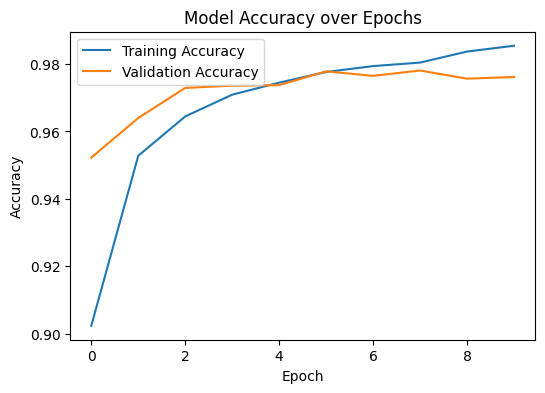

In [8]:
# Week 10 — Cell 7: Accuracy plot

plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Model Accuracy over Epochs")
plt.legend()
plt.show()


# Plot loss over epochs

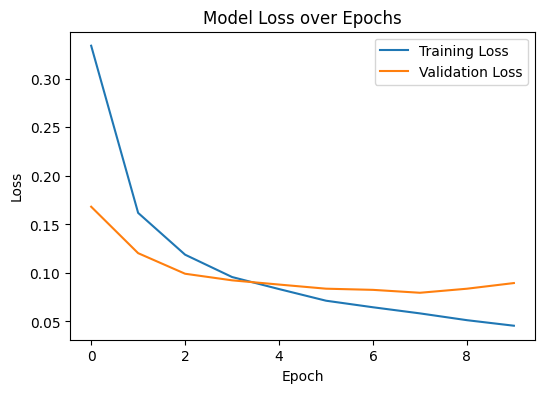

In [9]:
# Week 10 — Cell 8: Loss plot

plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Model Loss over Epochs")
plt.legend()
plt.show()


# Evaluate Test Accuracy

In [10]:
# Week 10 — Cell 9: Evaluate model on test data

test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.9765 - loss: 0.0830
Test Accuracy: 97.65%
